In [93]:
import os
os.getcwd()
os.chdir("D:/Data sets")
os.getcwd()

'D:\\Data sets'

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
%matplotlib inline
df=pd.read_csv("Iris.csv")

In [95]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [125]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [96]:
# Making a dictionary to replace the Categorical values to Numerical Values
li_1 = list(df['Species'].unique())
li_2 = list(range(1,4))

species_dic = dict(zip(li_1,li_2))
print (species_dic)

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}


In [97]:
# Replacing the Categorical values to Numerical Values (Mapping)
df = df.replace({'Species':species_dic})

In [98]:
df['Species'].unique()

array([1, 2, 3], dtype=int64)

In [99]:
Features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target = df['Species']

In [100]:
# Splitting the Data Set into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size = 0.30,random_state = 0)
print ("Train shape : ",X_train.shape)
print ("Test shape : ", X_test.shape)

Train shape :  (105, 4)
Test shape :  (45, 4)


In [101]:
    # Importing the performance metric
    !pip install xgboost
    import xgboost as XGB
    from xgboost import XGBClassifier
    from xgboost import plot_importance

    # Importing the performance metrics
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

Accuracy Score :  0.9777777777777777
f1_Score is    :  0.9779434092477569


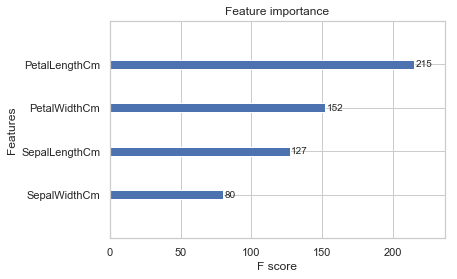

In [102]:
# Plotting the Feature Importances using the boosted gradient descent

# Training the Model
xgb_importance = XGBClassifier()
model_importance = xgb_importance.fit(X_train,y_train)

# Predicting using the trained XGB model
pred = model_importance.predict(X_test)

# Accuracy and f1_score of the XGB model
print ("Accuracy Score : ", accuracy_score(y_test, pred))
print ("f1_Score is    : ", f1_score(y_test, pred, average = 'weighted'))

# Plot feature importance
plot_importance(model_importance);

In [103]:
# Importing the Classifiers
from sklearn.cluster import AgglomerativeClustering
import warnings; warnings.simplefilter('ignore')

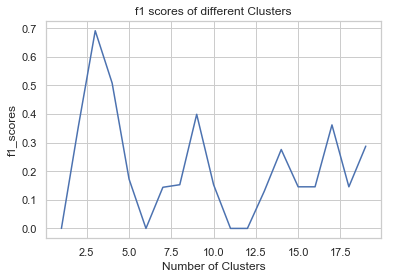

In [104]:
f1_scores = []

# Training and Predicting the train and test set and claculating the f1_scores for a range of 1 to 20
for n in range (1,20):
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    model_3 = cluster.fit(X_train, y_train)
    pred_3 = model_3.fit_predict(X_test)
    f1_scores.append(f1_score(y_test, pred_3, average = 'weighted'))

# Plotting the f1_scores
plt.xlabel("Number of Clusters")
plt.ylabel("f1_scores")
plt.title("f1 scores of different Clusters")
plt.plot(range(1,20),f1_scores);

In [105]:
# Selecting the best model
cluster = AgglomerativeClustering(n_clusters = f1_scores.index(max(f1_scores))+1, affinity = 'euclidean', linkage = 'ward')
model_3 = cluster.fit(X_train, y_train)

# Predicting with model_3
pred_3 = model_3.fit_predict(X_test)

# Accuracy and f1_score of the model_3
f1_score_Agglo = f1_score(y_test, pred_3, average = 'weighted')
print ("The Accuracy of the model_1 : ", accuracy_score(y_test, pred_3))
print ("The f1_score of the model_1 : ", f1_score_Agglo)

The Accuracy of the model_1 :  0.6444444444444445
The f1_score of the model_1 :  0.6910394265232974


In [106]:
# importing iris dataset
iris = datasets.load_iris()

In [107]:
#creating list to store f1-score and accuracy
f1_score =[]
accuracy=[]
model =['KNN','Hierarchical']

# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Text(0.5, 1.0, 'Petal')

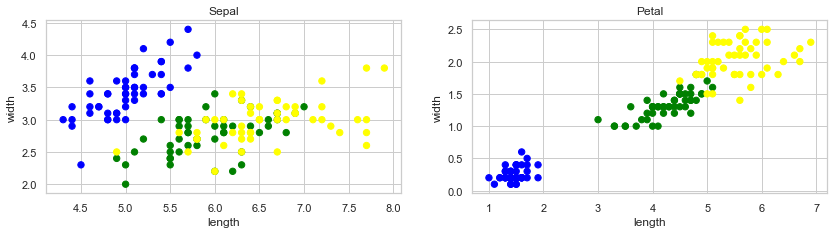

In [108]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['blue', 'green', 'yellow'])
 
# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.xlabel("length")
plt.ylabel("width")
plt.title('Sepal')
 
plt.subplot(2, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.xlabel("length")
plt.ylabel("width")
plt.title('Petal')

In [109]:
# K Means Cluster
kmodel = KMeans(n_clusters=3,random_state=10)
kmodel.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [110]:
# Getting accuracy
print(sm.accuracy_score(y, kmodel.labels_))
accuracy.append(sm.accuracy_score(y, kmodel.labels_))

0.8933333333333333


In [111]:
# getting f1_score
print(sm.f1_score(y,kmodel.labels_,average='weighted'))
f1_score.append(sm.f1_score(y,kmodel.labels_,average='weighted'))

0.8917748917748918


In [112]:
from sklearn.cluster import DBSCAN
from collections import  Counter
%matplotlib inline
rcParams['figure.figsize']=10,7
sb.set_style('whitegrid')
from pylab import rcParams
import seaborn as sb

In [113]:
dbmodel = DBSCAN(eps = 0.8, min_samples=15).fit(x)

In [114]:
# getting the outliners

outliners_df = pd.DataFrame(x)

print(Counter(dbmodel.labels_))

print(outliners_df[dbmodel.labels_==-1])

Counter({1: 95, 0: 50, -1: 5})
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


Text(0.5, 1.0, 'dbmodel Classification')

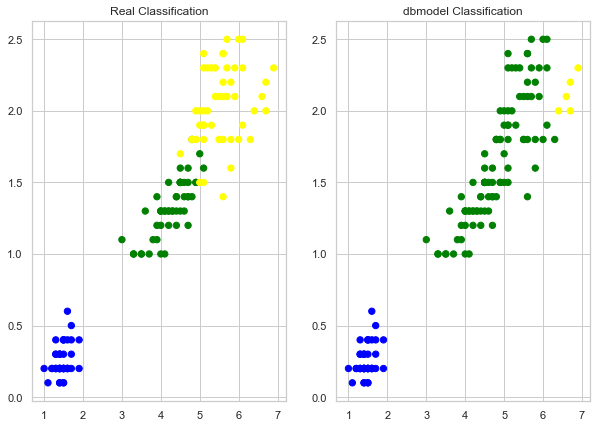

In [115]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[dbmodel.labels_], s=40)
plt.title('dbmodel Classification')

In [116]:
#getting accuracy
print(sm.accuracy_score(y,dbmodel.labels_))
accuracy.append(sm.accuracy_score(y,dbmodel.labels_))
#getting f1_score
print(sm.f1_score(y,dbmodel.labels_,average='weighted'))
f1_score.append(sm.f1_score(y,dbmodel.labels_,average='weighted'))

0.6666666666666666
0.5632183908045977


In [117]:
print(f1_score,f1_score_Agglo)

[0.8917748917748918, 0.5632183908045977] 0.6910394265232974


In [118]:
li_models = ['KMeans', 'Mean Shift', 'Agglomerative']

In [122]:
f1_scores_kmean=f1_score[0]
f1_scores_DBSCAN=f1_score[1]

In [123]:
print(f1_scores_kmean,f1_scores_DBSCAN,f1_score_Agglo)

0.8917748917748918 0.5632183908045977 0.6910394265232974


The best Model is KMeans with the f1_score of 0.8917748917748918


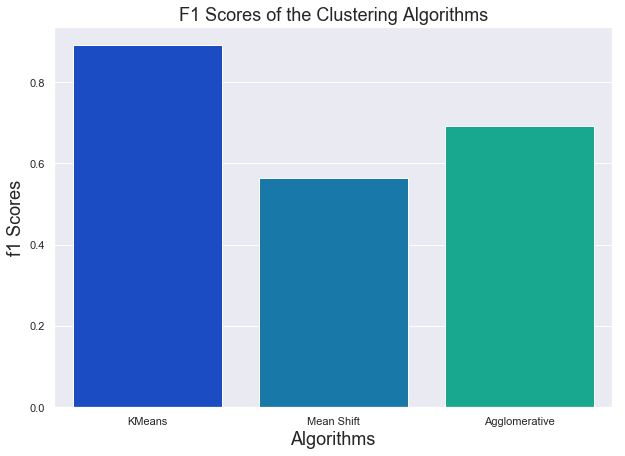

In [124]:
li_2 = [f1_scores_kmean, f1_scores_DBSCAN, f1_score_Agglo]

sns.set(style = 'darkgrid')
plt.xlabel("Algorithms", fontsize = 18)
plt.ylabel("f1 Scores", fontsize = 18)
plt.title("F1 Scores of the Clustering Algorithms", fontsize = 18);
sns.barplot(x = li_models, y = li_2, palette = 'winter');

print ("The best Model is", li_models[li_2.index(max(li_2))], "with the f1_score of", max(li_2))